# <center>State space zonal means and Hovmöllers of of assimilation stages, increments and biases</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dartplot import state

# Load data

In [2]:
state.load_truth?
#state.load_output
#state.load_increment

Signature: state.load_truth(archive, truth, time, lev=False)
Docstring:
Loads atmosphere history file from truth case into xarray DataArray

Inputs:
archive (str) --> path to directory containing history files e.g. f"/glade/derecho/scratch/{USER}/archive"
truth (str) --> name of truth case
time (str) --> time of hist file to be loaded e.g. "2020-08-08-21600"
lev (int) --> model vertical level to be plotted 

Returns:
ds_truth --> xarray DataArray
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

In [3]:
# Edit archive and truth to point to your own data before running as this example data may not exist in the future...
# ...and if you're not using the glade filesystem it cetainly won't exist...
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
time = "2020-08-08-21600"
lev = 25
ds_truth = state.load_truth(archive, truth, time, lev=lev)

In [4]:
exp = "FHIST_exp.1A_0001"
ds_forecast = state.load_forecast(archive, exp, time, lev=lev)
ds_output = state.load_output(archive, exp, time, lev=lev)
ds_increment = state.load_increment(ds_output, ds_forecast)

In [5]:
lon = ds_truth['lon']
lat = ds_truth['lat']

# Single time zonal means

In [6]:
state.zmean_unweighted?

Signature: state.zmean_unweighted(var, lat)
Docstring:
Creates zonal mean of a variable
Based on grid points so not area weighted
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

In [7]:
state.plot_zmean?

Signature: state.plot_zmean(zmean, zlat, ax, xlabel='', title='', color=False)
Docstring: <no docstring>
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

### Zonal mean values

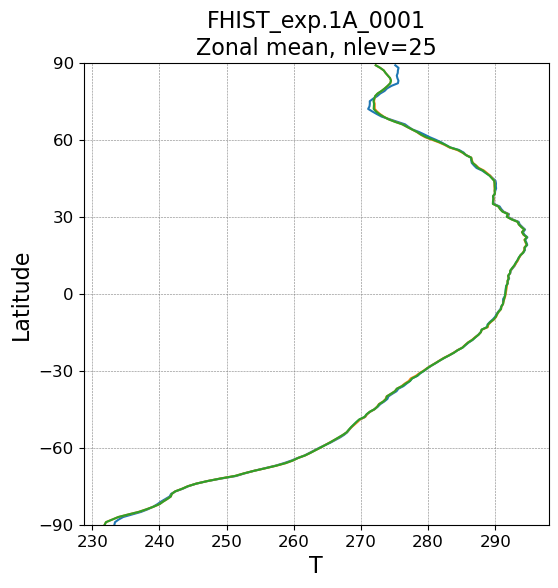

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
var = 'T'
zmean, zlat = state.zmean_unweighted(ds_truth[var], lat)
state.plot_zmean(zmean, zlat, ax)
zmean, zlat = state.zmean_unweighted(ds_forecast[var], lat)
state.plot_zmean(zmean, zlat, ax)
zmean, zlat = state.zmean_unweighted(ds_output[var], lat)
state.plot_zmean(zmean, zlat, ax, xlabel=var, title=f"{exp}\nZonal mean, nlev={lev}");

### Zonal mean errors

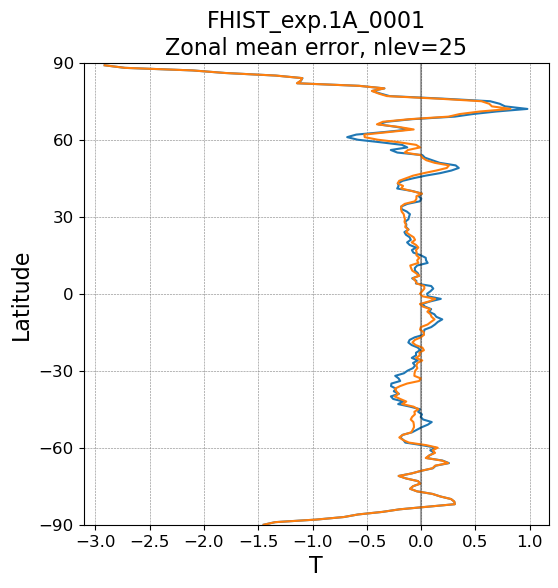

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
var = 'T'
zmean, zlat = state.zmean_unweighted(ds_forecast[var] - ds_truth[var], lat)
state.plot_zmean(zmean, zlat, ax)
zmean, zlat = state.zmean_unweighted(ds_output[var] - ds_truth[var], lat)
state.plot_zmean(zmean, zlat, ax, xlabel=var, title=f"{exp}\nZonal mean error, nlev={lev}");

### Zonal mean absolute errors, increment and error improvement

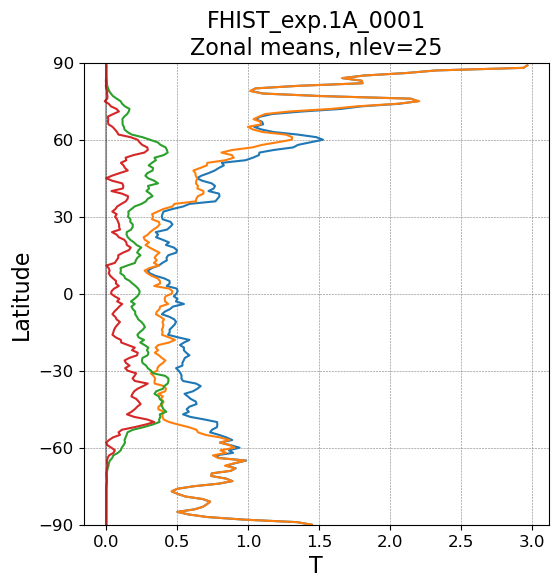

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
var = 'T'
zmean, zlat = state.zmean_unweighted(np.abs(ds_forecast[var] - ds_truth[var]), lat) #forecast error, blue
state.plot_zmean(zmean, zlat, ax);
zmean, zlat = state.zmean_unweighted(np.abs(ds_output[var] - ds_truth[var]), lat) #output error, orange
state.plot_zmean(zmean, zlat, ax);
zmean, zlat = state.zmean_unweighted(np.abs(ds_forecast[var] - ds_output[var]), lat) #increment magnitude, green
state.plot_zmean(zmean, zlat, ax);
zmean, zlat = state.zmean_unweighted(np.abs(ds_forecast[var] - ds_truth[var]) -
                                     np.abs(ds_output[var] - ds_truth[var]), lat) #error improvement, red
state.plot_zmean(zmean, zlat, ax, xlabel=var, title=f"{exp}\nZonal means, nlev={lev}");

# Zonal mean timeseries
No need to load data first for these.

To plot different quantities change "value" in calculate_zmean_timeseries to one of:\
"forecast_error", "output_error", "increment", "improvement", "forecast_sd", "output_sd", "ratio_sd"

In [12]:
state.calculate_zmean_timeseries?

Signature:
state.calculate_zmean_timeseries(
    archive,
    truth,
    exp,
    var,
    lev,
    value,
    abs,
    start_ind=False,
    end_ind=False,
    step=False,
)
Docstring:
Wrapper for all the zonal mean calculating functions

e.g. inputs:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
abs = True if want magnitude, False if want bias - Decides if using absolute error and increment

value_options:
"forecast_error", "output_error", "increment", "improvement",
"forecast_sd", "output_sd", "ratio_sd"
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

In [13]:
state.plot_zmean_timeseries?

Signature:
state.plot_zmean_timeseries(
    zmeans,
    zlat,
    xlabel='',
    title='',
    cmap='magma',
    cmapscale=0.8,
)
Docstring: <no docstring>
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

In [11]:
state.pcolor_zmean_timeseries?

Signature:
state.pcolor_zmean_timeseries(
    zmeans,
    zlat,
    times,
    label='',
    title='',
    clim_even=False,
    cmap='magma',
)
Docstring: clim_even (boolean) --> if True centers colormap around 0
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/state.py
Type:      function

### Forecast errors
(For output errors switch value to output_error)

Including abs=True is used to measure error magnitude, without caring about is bias is positive or negative./

Including abs=False helps determine if the error causes a mean bias that is positive or negative, but a value of zero does not necessarily imply a good forecast as regions of positive and negative biases may cancel each other out in the mean.


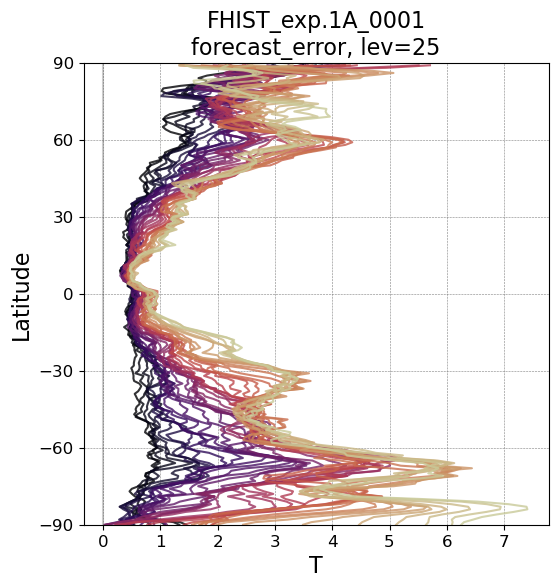

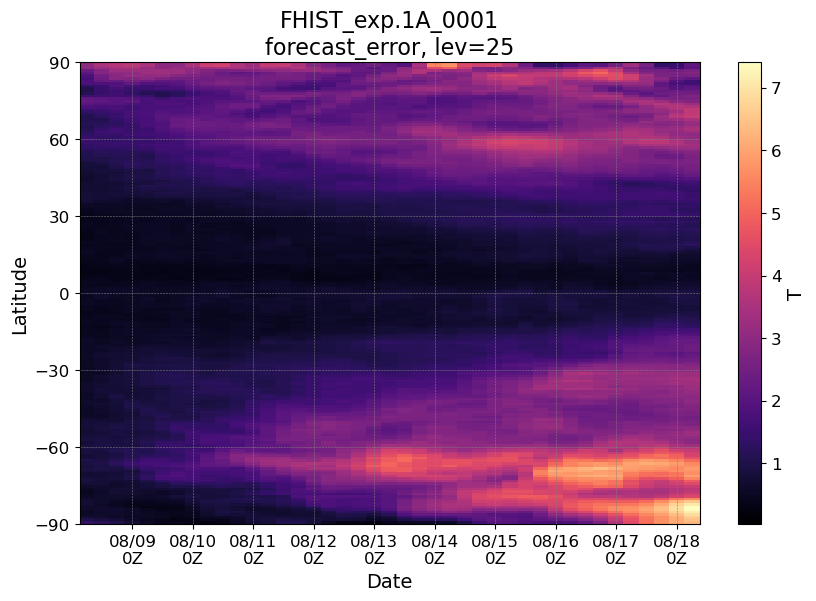

In [12]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "forecast_error"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=True,
                                                       start_ind=False, end_ind=False, step=False)

fig, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")

fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", cmap='magma')

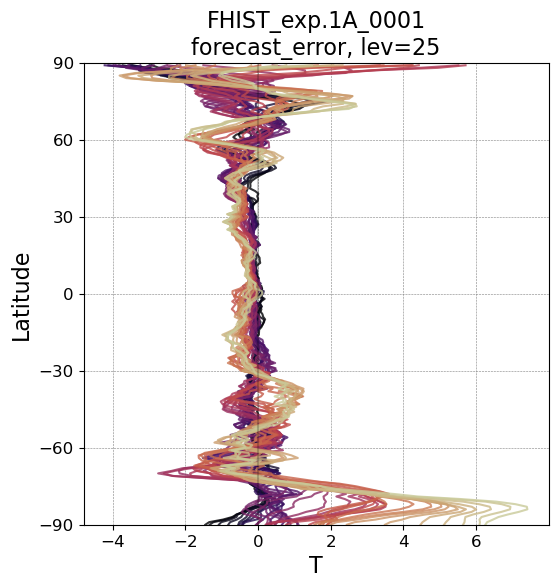

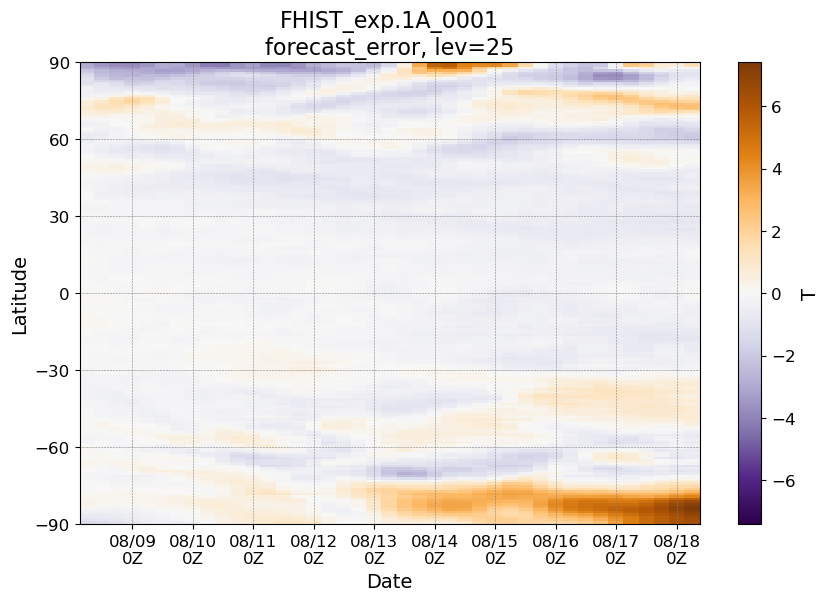

In [13]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "forecast_error"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=False,
                                                       start_ind=False, end_ind=False, step=False)

fix, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")
fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", clim_even=True, cmap='PuOr_r')

### Increment

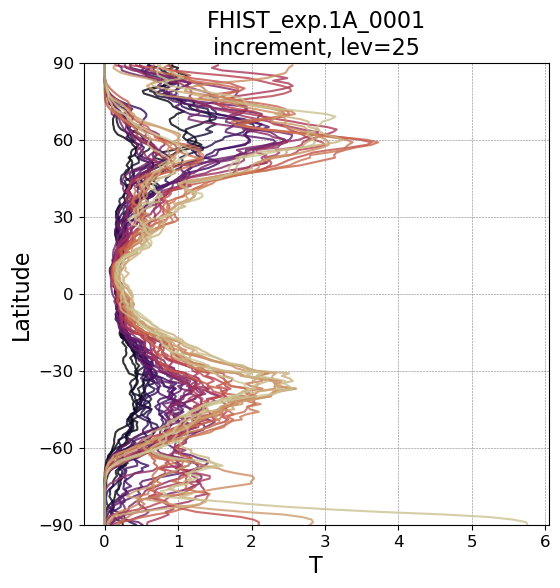

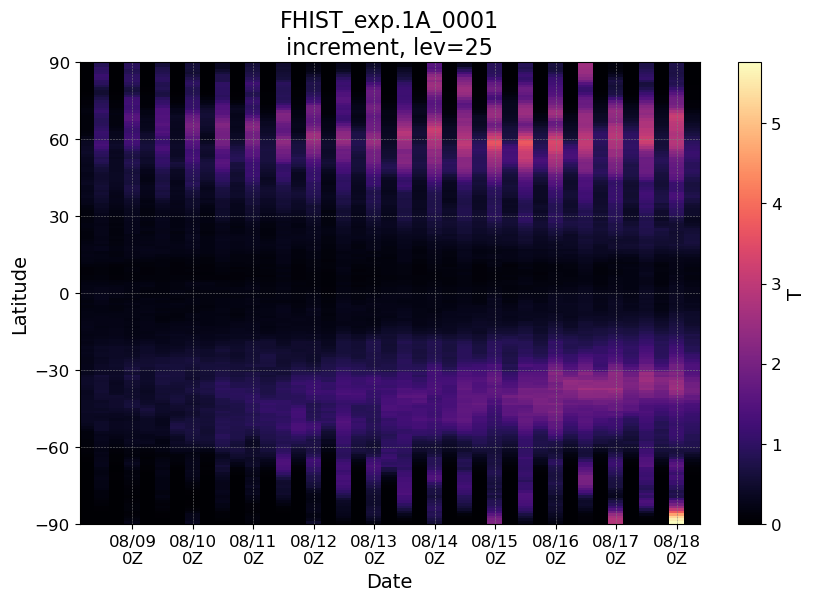

In [8]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "increment"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=True,
                                                       start_ind=False, end_ind=False, step=False)

fix, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")
fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", clim_even=False, cmap='magma')

### Improvement

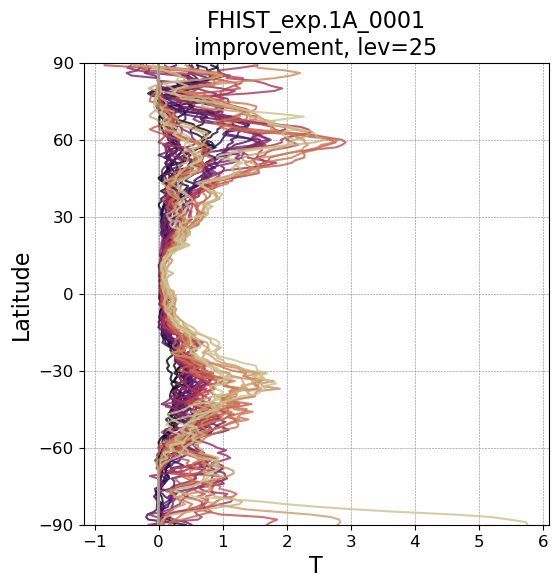

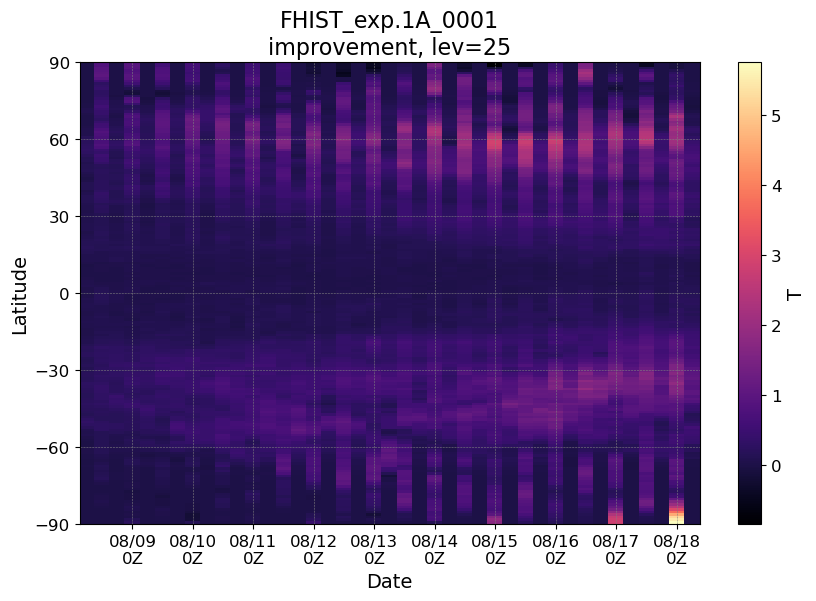

In [9]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "improvement"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=True,
                                                       start_ind=False, end_ind=False, step=False)

fix, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")
fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", clim_even=False, cmap='magma')

### Forecast Standard Deviation
Output standard deviation done in similar way

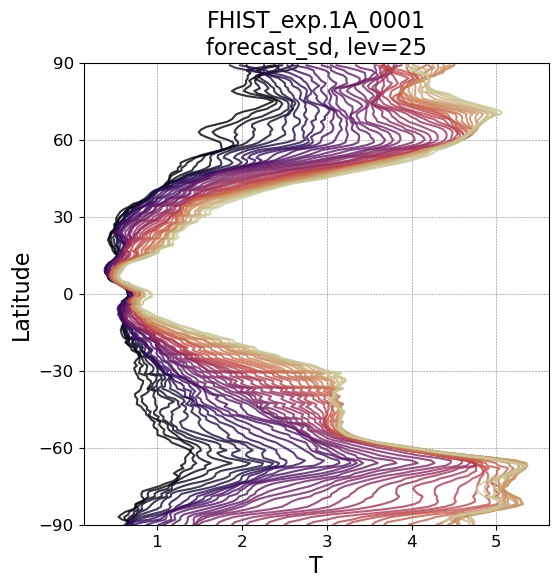

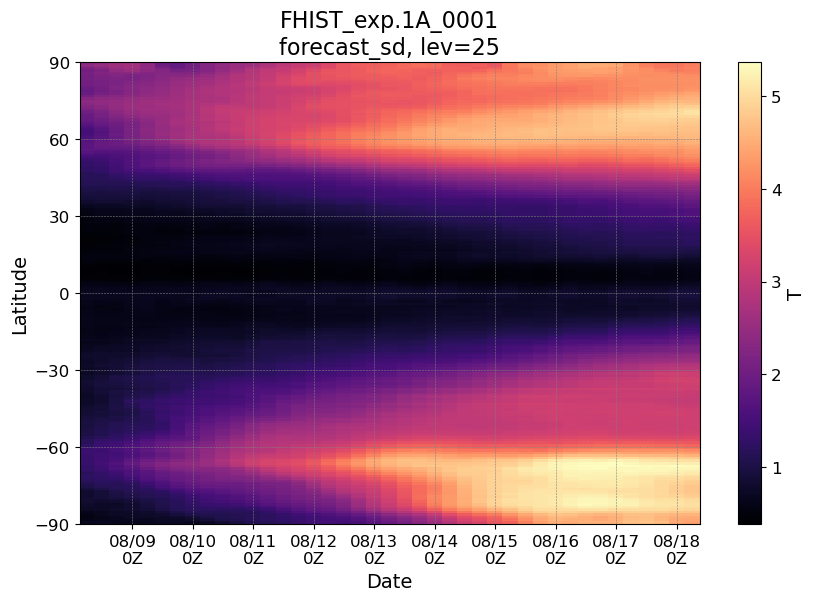

In [6]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "forecast_sd"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=False,
                                                       start_ind=False, end_ind=False, step=False)

fix, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")
fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", clim_even=False, cmap='magma')

### Standard deviation ratio 

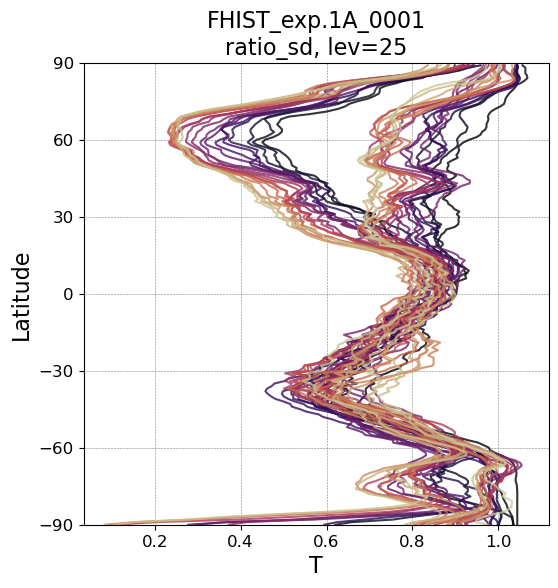

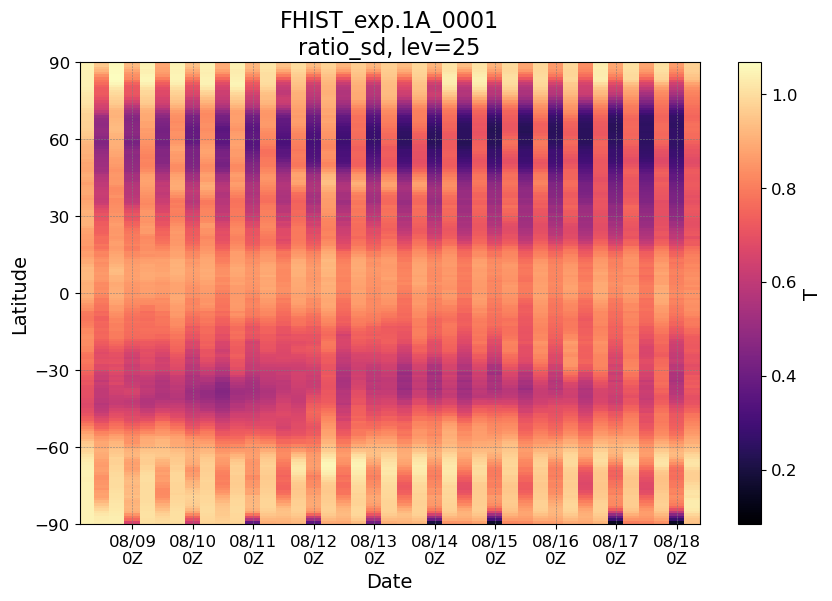

In [7]:
archive =  "/glade/derecho/scratch/chennuo/archive"
truth = "CESM2_2_BHIST_ne0ARCTICne30x4_g17_derecho_2560pes_spinup_allvars_from_20200701_2mos.004"
exp = "FHIST_exp.1A_0001"
var = 'T'
lev = 25
value = "ratio_sd"

zmeans, zlat, times = state.calculate_zmean_timeseries(archive, truth, exp, var, lev, value=value, abs=False,
                                                       start_ind=False, end_ind=False, step=False)

fix, ax = state.plot_zmean_timeseries(zmeans, zlat, xlabel=var, title=f"{exp}\n{value}, lev={lev}")
fig, ax = state.pcolor_zmean_timeseries(zmeans, zlat, times, label=var, title=f"{exp}\n{value}, lev={lev}", clim_even=False, cmap='magma')